```
@作者: 阿凯爱玩机器人
@QQ: 244561792
@微信: xingshunkai
@邮箱: xingshunkai@qq.com
@网址: deepsenserobot.com
@B站: "阿凯爱玩机器人"
```

## 导入依赖

In [1]:
# - 矩阵运算
import numpy as np
# - 图像处理
import cv2 
# - 绘图可视化
from matplotlib import pyplot as plt
# - 点云处理
import open3d as o3d

# 自定义库
# 从阿凯机器人工具箱导入Gemini335类
from kyle_robot_toolbox.camera import Gemini335
from kyle_robot_toolbox.open3d import draw_geometry

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


pybullet build time: Jun  3 2022 02:05:55


[INFO][pyorbbecsdk]添加动态链接库检索路径
/usr/local/lib/python3.10/dist-packages/kyle_robot_toolbox/lib/pyorbbecsdk/linux
[INFO][pyorbbecsdk]添加动态链接库检索路径
/usr/local/lib/python3.10/dist-packages/kyle_robot_toolbox/lib/pyorbbecsdk/linux


In [2]:
%matplotlib inline

## 相机初始化

In [3]:
# 创建相机对象
camera = Gemini335()

[05/29 12:54:34.762689][info][13675][Context.cpp:68] Context created with config: default config!
[05/29 12:54:34.762723][info][13675][Context.cpp:73] Work directory=/home/kyle/Project/奥比中光3D相机/deepsense-gemini335/04.Gemini335-3D相机案例源码/basic-example, SDK version=v1.10.5-20240511-7dc8be9
[05/29 12:54:34.762742][info][13675][LinuxPal.cpp:31] createObPal: create LinuxPal!
[05/29 12:54:34.940791][info][13675][LinuxPal.cpp:142] Create PollingDeviceWatcher!
[05/29 12:54:34.940823][info][13675][DeviceManager.cpp:15] Current found device(s): (1)
[05/29 12:54:34.940827][info][13675][DeviceManager.cpp:24] 	- Name: Orbbec Gemini 335, PID: 0x0800, SN/ID: CP1L44P00049, Connection: USB3.2
[05/29 12:54:35.407688][error][13675][HostProtocol.cpp:420] Set property value failed! propertyId:63, rc:{statusCode: 9, respErrorCode: 2, msg: }
[05/29 12:54:35.407941][error][13675][HostProtocol.cpp:420] Set property value failed! propertyId:63, rc:{statusCode: 9, respErrorCode: 2, msg: }


## 获取彩图与深度图

In [4]:
# 使用read函数同时读取彩图与深度图
color_img, depth_img = camera.read()
# 彩图去除畸变
color_img_undistor = camera.remove_distortion(color_img)

可视化

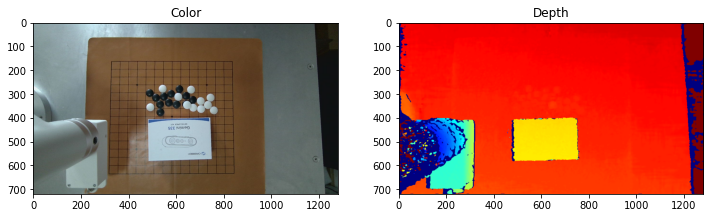

In [6]:
plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.title("Color")
plt.imshow(color_img_undistor[:, :, ::-1])

plt.subplot(1, 2, 2)
plt.title("Depth")
depth_canvas = camera.depth_img2canvas(depth_img, min_distance=200, max_distance=500)
plt.imshow(depth_canvas[:, :, ::-1])

plt.savefig("data/read_pcd_color/color_and_depth.png")

## 获取点云

In [11]:
# 彩图与深度图转换为点云 
# 设置点云 Z轴坐标有效范围 [min_distance, max_distance]
# 根据自己实际情况进行调整
pcd = camera.get_pcd(color_img_undistor, depth_img, \
                     min_distance=200,  max_distance=500, \
                     camera="rgb_camera")

In [12]:
# 展示点云
draw_geometry([pcd], window_name="彩色点云")

## 保存点云

In [13]:
# 保存PCD点云(二进制格式)
ret = o3d.io.write_point_cloud("./data/read_pcd_color/demo.pcd", pcd)
if ret:
    print("点云保存成功")
else:
    print("点云保存失败, 查看路径是否存在")

点云保存成功


In [14]:
# 保存为PCD点云字符格式
# 保存PCD点云-字符格式
o3d.io.write_point_cloud("./data/read_pcd_color/demo_str.pcd", pcd, write_ascii=True)

True

## 点云载入

在载入点云的时候，Open3D会自动判断是二进制格式还是字符格式的PCD点云。

In [15]:
# 从文件中载入点云
pcd2 = o3d.io.read_point_cloud("./data/read_pcd_color/demo.pcd")

# 如果路径不存在，仍然会返回点云对象, 只是点数为0
if len(np.asarray(pcd2.points))== 0:
    print("点云读取失败")
else:
    print("点云读取成功")
    # 展示点云
    draw_geometry([pcd2], window_name="彩色点云")

点云读取成功
